# Feature Scaling

Feature scaling is an essential step in data preprocessing, especially when working with machine learning algorithms. It ensures that the range of features is consistent, which can significantly impact model performance.

---

## Table of Contents

1. [Introduction to Feature Scaling](#1-introduction-to-feature-scaling)
2. [Normalization (Min-Max Scaling)](#2-normalization-min-max-scaling)
3. [Standardization (Z-score Scaling)](#3-standardization-z-score-scaling)
4. [Robust Scaler](#4-robust-scaler)
5. [Max Abs Scaler](#5-max-abs-scaler)
6. [Visualizing Scaled Features](#6-visualizing-scaled-features)

---

## 1. Introduction to Feature Scaling

Scaling ensures that numerical features have a similar scale, which is important for machine learning algorithms such as gradient descent-based models and distance-based models (like KNN or SVM).

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('categorical_data.csv')

In [6]:
data.drop(columns=["ID"],inplace=True)
data.head()

,Product_Name,Category,Region,Price,Sales,Discount_Percentage,Customer_Rating
0,Product_1,Furniture,South,870.28,6451,13.86,4.5
1,Product_2,Books,South,525.13,7745,39.55,3.6
2,Product_3,Furniture,West,809.60,8295,43.45,2.6
3,Product_4,Books,South,953.33,7416,49.26,1.9
4,Product_5,Food,North,363.77,9391,19.13,2.0


In [7]:
numerical_cols = data.select_dtypes(include=["int64","float64"]).columns
print("Numerical columns to scale:", numerical_cols.tolist())

Numerical columns to scale: ['Price', 'Sales', 'Discount_Percentage', 'Customer_Rating']


## 2. Normalization (Min-Max Scaling)

Normalization scales the data into a fixed range, typically between 0 and 1. It is sensitive to outliers but is effective when the data distribution is not Gaussian.

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_norm = data.copy()
data_norm[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Normalized data:\n", data_norm[numerical_cols].head())

Normalized data:
       Price     Sales  Discount_Percentage  Customer_Rating
0  0.874831  0.651743             0.279773            0.875
1  0.521382  0.785228             0.800974            0.650
2  0.812692  0.841964             0.880097            0.400
3  0.959878  0.751289             0.997971            0.225
4  0.356142  0.955024             0.386691            0.250


Min-Max scaling is ideal for algorithms like Neural Networks or K-Means, where the range of data can affect performance.

## 3. Standardization (Z-score Scaling)

Standardization transforms the data to have a mean of 0 and a standard deviation of 1. It works well with algorithms that assume a Gaussian distribution of features.

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_standard = data.copy()
data_standard[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Standardized data:\n", data_standard[numerical_cols].head())

Standardized data:
       Price     Sales  Discount_Percentage  Customer_Rating
0  1.403863  0.504554            -0.706682         1.340127
1  0.142732  0.964358             1.109429         0.563742
2  1.182147  1.159793             1.385133        -0.298908
3  1.707317  0.847453             1.795861        -0.902763
4 -0.446856  1.549241            -0.334128        -0.816498


Standardization is commonly used in algorithms like Support Vector Machines (SVM) and Principal Component Analysis (PCA).

## 4. Robust Scaler

The Robust Scaler is less sensitive to outliers because it uses the median and interquartile range (IQR) for scaling.

In [10]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

data_robust = data.copy()
data_robust[numerical_cols]= scaler.fit_transform(data[numerical_cols])

print("Robust scaled data:\n", data_robust[numerical_cols].head())

Robust scaled data:
       Price     Sales  Discount_Percentage  Customer_Rating
0  0.881340  0.221814            -0.529130         0.714286
1  0.084153  0.485748             0.644734         0.285714
2  0.741189  0.597930             0.822938        -0.190476
3  1.073159  0.418643             1.088417        -0.523810
4 -0.288537  0.821478            -0.288325        -0.476190


The Robust Scaler is effective for datasets with outliers that may distort standard scaling techniques.

## 5. Max Abs Scaler

The Max Abs Scaler scales the data by its maximum absolute value, which is useful when the data is sparse or when preserving the sign of the data is important.

In [11]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()

data_abs = data.copy()
data_abs[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("Max-Abs scaled data:\n", data_abs[numerical_cols].head())

Max-Abs scaled data:
       Price     Sales  Discount_Percentage  Customer_Rating
0  0.876848  0.656457             0.280794             0.90
1  0.529093  0.788135             0.801256             0.72
2  0.815710  0.844103             0.880267             0.52
3  0.960524  0.754656             0.997974             0.38
4  0.366515  0.955632             0.387561             0.40


Max Abs scaling is ideal when dealing with sparse data or non-negative features.

## 6. Visualizing Scaled Features

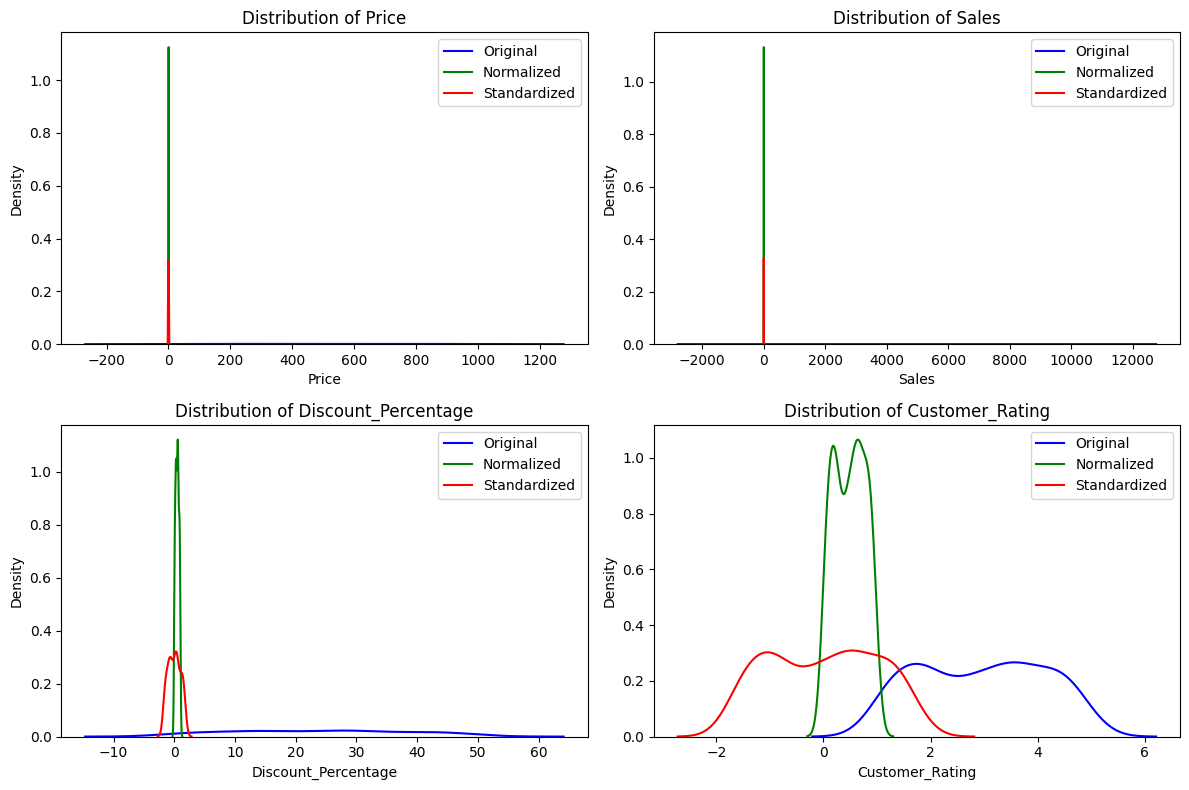

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for ax, col in zip(axes.flatten(), numerical_cols):
    sns.kdeplot(data[col],ax=ax,label="Original",color="Blue")
    sns.kdeplot(data_norm[col], ax=ax, label='Normalized', color='green')
    sns.kdeplot(data_standard[col], ax=ax, label='Standardized', color='red')
    ax.set_title(f'Distribution of {col}')
    ax.legend()
    
plt.tight_layout()
plt.show()